### Tennessee opioid risk modeling 
Normal adjacency matrix - Dimentions would be different.
Adding the feature to find the bearth of death of each feature!

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pickle as pickle
from pylab import *
%matplotlib inline

import warnings

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
tn_svi_nod = gpd.read_file('./data/processed data/SVI with HepVu census tracts/SVI2018 TN census tracts with death rate HepVu/SVI2018_TN_census_tracts_with_death_rate_HepVu.shp')

In [7]:
selected_variables = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ','NOD_Rate']
selected_variables_without_y = ['EP_POV','EP_UNEMP','EP_PCI','EP_NOHSDP','EP_UNINSUR','EP_AGE65','EP_AGE17','EP_DISABL','EP_SNGPNT','EP_LIMENG','EP_MINRTY','EP_MUNIT','EP_MOBILE','EP_CROWD','EP_NOVEH','EP_GROUPQ']
selected_variables_tn_with_geo = ['FIPS','EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV','NOD_Rate','geometry']
selected_variables_tn = ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV']
selected_variables_tn_with_od = ['EP_DISABL', 'EP_NOHSDP', 'EP_PCI', 'EP_MOBILE', 'EP_POV','NOD_Rate']

In [8]:
# get the number of rows with 999 or -999 values in the selected_variablesWy_ columns
rows_with_n999 = tn_svi_nod[(tn_svi_nod['EP_DISABL'] == -999) | (tn_svi_nod['EP_NOHSDP'] == -999) | (tn_svi_nod['EP_PCI'] == -999) | (tn_svi_nod['EP_MOBILE'] == -999) | (tn_svi_nod['EP_POV'] == -999)].shape[0]

In [9]:
rows_with_n999

23

In [10]:
# if value equals -999, replace with 0 in selected_variablesWy_
tn_svi_nod[selected_variables_tn[0]] = tn_svi_nod[selected_variables_tn[0]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[1]] = tn_svi_nod[selected_variables_tn[1]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[2]] = tn_svi_nod[selected_variables_tn[2]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[3]] = tn_svi_nod[selected_variables_tn[3]].replace(-999, 0)
tn_svi_nod[selected_variables_tn[4]] = tn_svi_nod[selected_variables_tn[4]].replace(-999, 0)

In [11]:
tn_svi_nod[selected_variables_tn_with_geo]

,FIPS,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV,NOD_Rate,geometry
0,47001980100,0.0,0.0,0.0,0.0,0.0,38.3,"POLYGON ((-84.30167 35.97862, -84.29421 35.982..."
1,47009980100,25.0,0.0,8560.0,0.0,0.0,33.4,"POLYGON ((-84.01403 35.80881, -84.00916 35.812..."
2,47017980100,0.0,0.0,0.0,0.0,0.0,18.3,"POLYGON ((-88.70523 35.82485, -88.70462 35.828..."
3,47029980100,0.0,0.0,0.0,0.0,0.0,29.3,"POLYGON ((-83.28079 35.74700, -83.28016 35.749..."
4,47037013000,0.0,28.3,5365.0,0.0,0.0,34.8,"POLYGON ((-86.91273 36.19354, -86.91046 36.198..."
...,...,...,...,...,...,...,...,...
1492,47157003200,17.3,6.9,30994.0,0.0,18.7,17.0,"POLYGON ((-90.00407 35.13561, -90.00381 35.135..."
1493,47157003700,23.5,24.1,18683.0,0.0,41.6,17.0,"POLYGON ((-90.03483 35.13866, -90.03374 35.138..."
1494,47157003800,43.4,20.0,14127.0,0.0,56.8,17.0,"POLYGON ((-90.03349 35.14052, -90.03274 35.145..."
1495,47157007300,18.3,11.1,22042.0,0.0,34.8,17.0,"POLYGON ((-89.94575 35.11546, -89.94555 35.120..."


#### Check the distribution of each selected variable

In [12]:
tn_svi_nod[selected_variables_tn].describe()

,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,16.017902,13.815631,27389.054776,9.225518,17.480561
std,6.287535,7.928427,12700.779813,10.530936,12.204625
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.600000,7.700000,20445.000000,0.400000,8.800000
50%,15.900000,13.700000,24793.000000,4.500000,15.500000
75%,20.200000,18.900000,30979.000000,16.800000,23.100000
max,43.400000,45.800000,108189.000000,47.300000,78.900000


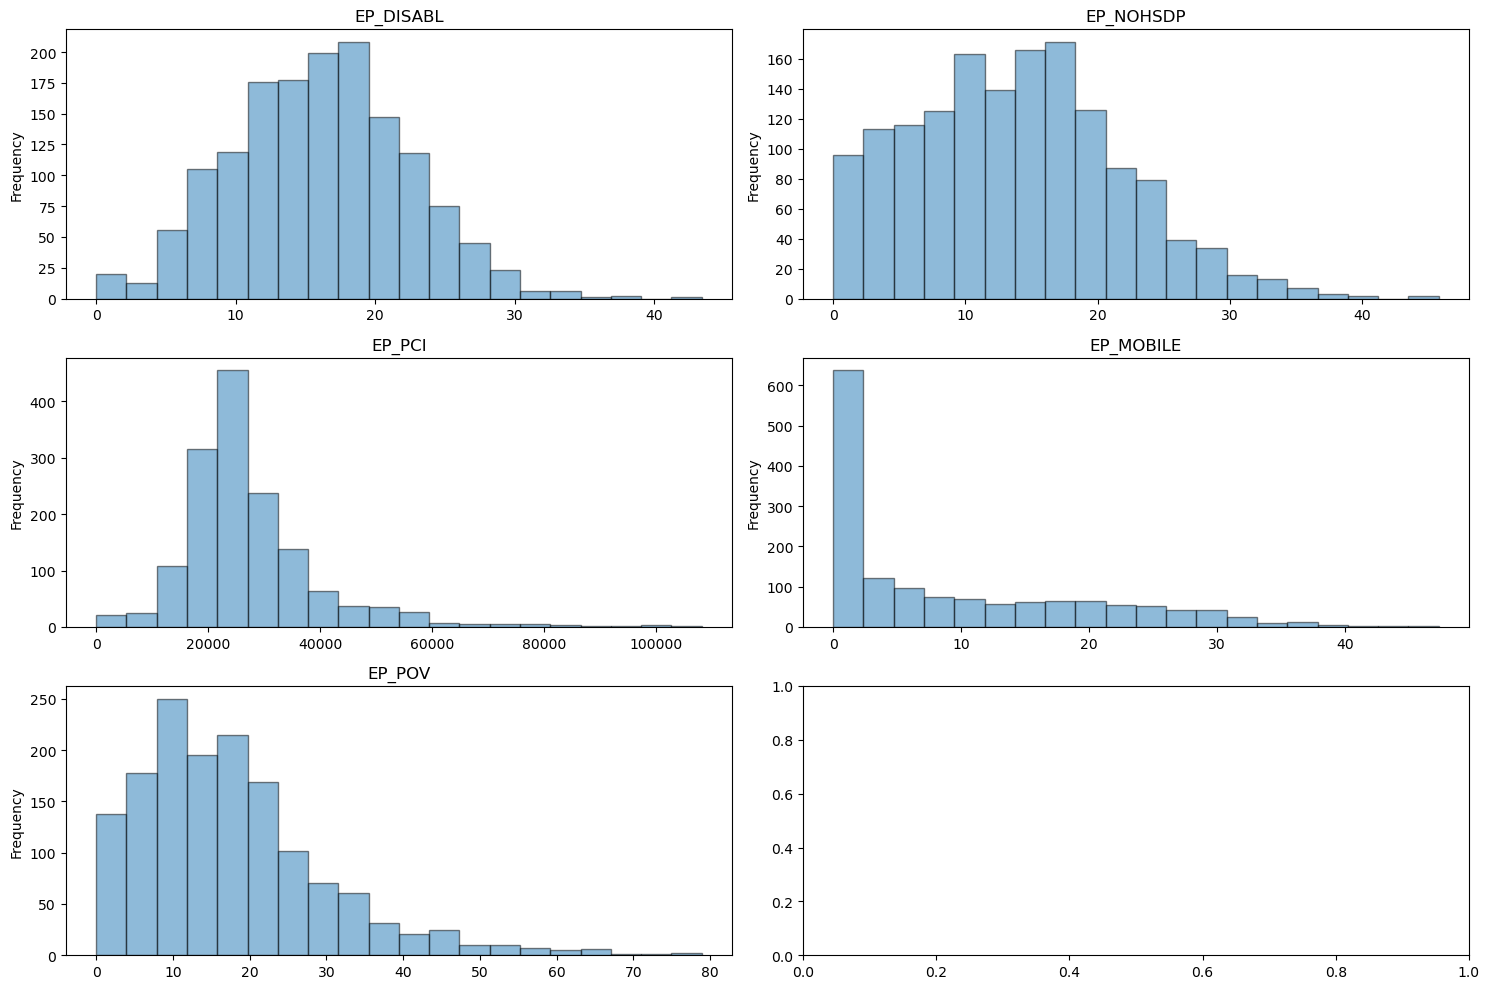

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for i, ax in zip(selected_variables_tn, axes.flatten()):
    tn_svi_nod[i].plot.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
    ax.set_title(i, fontsize=12)  # Adjust the fontsize here

plt.tight_layout()
plt.show()

In [14]:
# calculate the 50th and 75th and 90th percentile for each variable
variable_1_percentile_50 = tn_svi_nod[selected_variables_tn[0]].quantile(0.5)
variable_1_percentile_75 = tn_svi_nod[selected_variables_tn[0]].quantile(0.75)
variable_1_percentile_90 = tn_svi_nod[selected_variables_tn[0]].quantile(0.9)

variable_2_percentile_50 = tn_svi_nod[selected_variables_tn[1]].quantile(0.5)
variable_2_percentile_75 = tn_svi_nod[selected_variables_tn[1]].quantile(0.75)
variable_2_percentile_90 = tn_svi_nod[selected_variables_tn[1]].quantile(0.9)

variable_3_percentile_50 = tn_svi_nod[selected_variables_tn[2]].quantile(0.5)
variable_3_percentile_75 = tn_svi_nod[selected_variables_tn[2]].quantile(0.75)
variable_3_percentile_90 = tn_svi_nod[selected_variables_tn[2]].quantile(0.9)

variable_4_percentile_50 = tn_svi_nod[selected_variables_tn[3]].quantile(0.5)
variable_4_percentile_75 = tn_svi_nod[selected_variables_tn[3]].quantile(0.75)
variable_4_percentile_90 = tn_svi_nod[selected_variables_tn[3]].quantile(0.9)

variable_5_percentile_50 = tn_svi_nod[selected_variables_tn[4]].quantile(0.5)
variable_5_percentile_75 = tn_svi_nod[selected_variables_tn[4]].quantile(0.75)
variable_5_percentile_90 = tn_svi_nod[selected_variables_tn[4]].quantile(0.9)

In [15]:
# for each selected vcariable wy calculate the number of rows that are below 50th, 75th and 90th percentile
variable_1_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[0]] < variable_1_percentile_50].shape[0]
variable_1_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[0]] < variable_1_percentile_75].shape[0]
variable_1_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[0]] < variable_1_percentile_90].shape[0]

variable_2_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[1]] < variable_2_percentile_50].shape[0]
variable_2_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[1]] < variable_2_percentile_75].shape[0]
variable_2_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[1]] < variable_2_percentile_90].shape[0]

variable_3_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[2]] < variable_3_percentile_50].shape[0]
variable_3_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[2]] < variable_3_percentile_75].shape[0]
variable_3_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[2]] < variable_3_percentile_90].shape[0]

variable_4_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[3]] < variable_4_percentile_50].shape[0]
variable_4_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[3]] < variable_4_percentile_75].shape[0]
variable_4_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[3]] < variable_4_percentile_90].shape[0]

variable_5_below_50 = tn_svi_nod[tn_svi_nod[selected_variables_tn[4]] < variable_5_percentile_50].shape[0]
variable_5_below_75 = tn_svi_nod[tn_svi_nod[selected_variables_tn[4]] < variable_5_percentile_75].shape[0]
variable_5_below_90 = tn_svi_nod[tn_svi_nod[selected_variables_tn[4]] < variable_5_percentile_90].shape[0]

# create a dataframe with the results
data = {'Variable': selected_variables_tn, '50th Percentile': [variable_1_percentile_50, variable_2_percentile_50, variable_3_percentile_50, variable_4_percentile_50, variable_5_percentile_50], '75th Percentile': [variable_1_percentile_75, variable_2_percentile_75, variable_3_percentile_75, variable_4_percentile_75, variable_5_percentile_75], '90th Percentile': [variable_1_percentile_90, variable_2_percentile_90, variable_3_percentile_90, variable_4_percentile_90, variable_5_percentile_90], 'Rows below 50th Percentile': [variable_1_below_50, variable_2_below_50, variable_3_below_50, variable_4_below_50, variable_5_below_50], 'Rows below 75th Percentile': [variable_1_below_75, variable_2_below_75, variable_3_below_75, variable_4_below_75, variable_5_below_75], 'Rows below 90th Percentile': [variable_1_below_90, variable_2_below_90, variable_3_below_90, variable_4_below_90, variable_5_below_90]}
percentile_df = pd.DataFrame(data)

percentile_df

,Variable,50th Percentile,75th Percentile,90th Percentile,Rows below 50th Percentile,Rows below 75th Percentile,Rows below 90th Percentile
0,EP_DISABL,15.9,20.2,24.10,738,1122,1343
1,EP_NOHSDP,13.7,18.9,24.14,747,1119,1347
2,EP_PCI,24793.0,30979.0,41638.60,748,1122,1347
3,EP_MOBILE,4.5,16.8,25.84,747,1120,1347
4,EP_POV,15.5,23.1,33.90,746,1120,1345


### Adjacency Method

In [16]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import itertools
from itertools import combinations
from scipy import spatial
import pickle as pickle
import gudhi
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import io
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageChops, ImageFont
import shapely.geometry as geom
from shapely.ops import unary_union
import warnings

import invr

In [17]:
tn_filtered = tn_svi_nod[selected_variables_tn_with_geo]

In [18]:
#reset index
tn_filtered = tn_filtered.reset_index(drop=True)

In [19]:
tn_filtered.head(3)

,FIPS,EP_DISABL,EP_NOHSDP,EP_PCI,EP_MOBILE,EP_POV,NOD_Rate,geometry
0,47001980100,0.0,0.0,0.0,0.0,0.0,38.3,"POLYGON ((-84.30167 35.97862, -84.29421 35.982..."
1,47009980100,25.0,0.0,8560.0,0.0,0.0,33.4,"POLYGON ((-84.01403 35.80881, -84.00916 35.812..."
2,47017980100,0.0,0.0,0.0,0.0,0.0,18.3,"POLYGON ((-88.70523 35.82485, -88.70462 35.828..."


In [20]:
# get the uniques fips codes
fips = tn_filtered['FIPS'].unique()
fips

array(['47001980100', '47009980100', '47017980100', ..., '47157003800',
       '47157007300', '47157011400'], dtype=object)

Generate adjacent counties

In [21]:
def generate_adjacent_counties(dataframe,filtration_threshold,variable_name):

    
    filtered_df = dataframe[dataframe[variable_name] < filtration_threshold]

    # Perform a spatial join to find adjacent precincts
    adjacent_counties = gpd.sjoin(filtered_df, filtered_df, predicate='intersects', how='left')

    # Filter the results to include only the adjacent states
    adjacent_counties = adjacent_counties.query('sortedID_left != sortedID_right')

    # Group the resulting dataframe by the original precinct Name and create a list of adjacent precinct Name
    adjacent_counties = adjacent_counties.groupby('sortedID_left')['sortedID_right'].apply(list).reset_index()

    adjacent_counties.rename(columns={'sortedID_left': 'county', 'sortedID_right': 'adjacent'}, inplace=True)

    adjacencies_list = adjacent_counties['adjacent'].tolist()
    county_list = adjacent_counties['county'].tolist()

    merged_df = pd.merge(adjacent_counties, dataframe, left_on='county',right_on='sortedID', how='left')
    merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')

    return adjacencies_list,merged_df,county_list

In [22]:
def form_simplicial_complex(adjacent_county_list,county_list):
    max_dimension = 3

    V = []
    V = invr.incremental_vr(V, adjacent_county_list, max_dimension,county_list)

    return V

In [23]:
def fig2img(fig):
     #convert matplot fig to image and return it

     buf = io.BytesIO()
     fig.savefig(buf)
     buf.seek(0)
     img = Image.open(buf)
     return img

In [24]:
def plot_simplicial_complex(dataframe,V):

    #city centroids
    city_coordinates = {city.sortedID: np.array((city.geometry.centroid.x, city.geometry.centroid.y)) for _, city in dataframe.iterrows()}

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_axis_off() 

    # Plot the "wyoming_svi" DataFrame
    dataframe.plot(ax=ax, edgecolor='black', linewidth=0.3, color="white")

    # Plot the centroid of the large square with values
    # for i, row in dataframe.iterrows():
    #     centroid = row['geometry'].centroid
    #     # text_to_display = f"FIPS: {row['FIPS']}\nFilteration: {row['EP_SNGPNT']}"
    #     plt.text(centroid.x, centroid.y, str(row['FIPS']), fontsize=8, ha='center', color="black")
    #     # plt.text(centroid.x, centroid.y, text_to_display, fontsize=10, ha='center', color="black")

    for edge_or_traingle in V:

        
        if len(edge_or_traingle) == 2:
            # Plot an edge
            ax.plot(*zip(*[city_coordinates[vertex] for vertex in edge_or_traingle]), color='red', linewidth=1)
            # img = fig2img(fig)
            # list_gif.append(img)
        elif len(edge_or_traingle) == 3:
            # Plot a triangle
            ax.add_patch(plt.Polygon([city_coordinates[vertex] for vertex in edge_or_traingle], color='green', alpha=0.2))
            # img = fig2img(fig)
            # list_gif.append(img)
    plt.show()
    plt.close()

    #return list_gif #deleted  plot_simplicial_complex(dataframe,V,list_gif) --> list part

Compute adjacency method for a single variable

In [25]:
variable_name = "EP_PCI"
threshold = 24793.0